# 第1回　線形回帰
2020年3月16日（月）　石村遼汰

## データセット
ボストン住宅価格データ

In [1]:
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

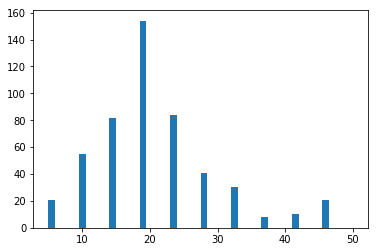

In [13]:
import matplotlib.pyplot as plt

plt.hist(y, width=1)

## scikit-learnの線形回帰モデル

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 係数

In [19]:
lr.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

### 切片

In [20]:
lr.intercept_

36.459488385089855

## 自力で実装ver.

In [6]:
import numpy as np

class MyLinearRegression():
    def __init__(self, fit_intercept=True):
        self.w = None
        self.coef_ = None
        self.intercept_ = None
        self.fit_intercept = fit_intercept
        
    def add_constant(self, X):
        X['const'] = 1
        return X
    
    def fit(self, X, y):
        X = X.values
        # 定数項を追加
        if self.fit_intercept:
            X = self.add_constant(X)
        # 係数を求める
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y
        self.coef_ = self.w[:-1]
        self.intercept_ = self.w[-1]
        return
    
    def predict(self, X):
        # 定数項を追加
        if self.fit_intercept:
            X = self.add_constant(X)
        y_pred = X @ self.w
        return y_pred
    
    def summary(self, X, y):
        self.fit(self, X, y)
        if self.fit_intercept:
            X = self.add_const(X)
        y_pred = self.predict(X)
        ssr = (y - y_pred).T @ (y - y_pred)
        degree_of_freedom = X.shape[0] - X.shape[1]
        var_w_hat = ssr * np.linalg.inv(X.T @ X) / degree_of_freedom
        sds = np.sqrt(var_w_hat)

In [116]:
mlr = MyLinearRegression()
mlr.fit(X, y)

In [117]:
mlr.intercept_

36.459488385066884

In [118]:
mlr.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [119]:
y_pred2 = mlr.predict(X)

In [111]:
y_pred2[:3]

array([30.00384338, 25.02556238, 30.56759672])

In [112]:
y_pred[:3]

array([30.00384338, 25.02556238, 30.56759672])

In [11]:
y_pred = lr.predict(X)

## t値など求めていく

In [12]:
ssr = (y - y_pred).T @ (y - y_pred)
ssr

11078.784577954977

In [13]:
X_add = X.copy()
X_add['const'] = 1

In [14]:
degree_of_freedom = X_add.shape[0] - X_add.shape[1]
var_w_hat = ssr * np.linalg.inv(X_add.T @ X_add) / degree_of_freedom

In [15]:
sds = np.sqrt(var_w_hat)

In [16]:
for i, c in enumerate(X_add.columns):
    print(f'{c}---{sds[i, i]}')

CRIM---0.03286499418294783
ZN---0.01372746154288549
INDUS---0.06149568895208644
CHAS---0.8615797562099247
NOX---3.8197437074023384
RM---0.41792525380956597
AGE---0.013209781983681917
DIS---0.19945473465910787
RAD---0.06634644028852214
TAX---0.003760536446267896
PTRATIO---0.13082675587501233
B---0.0026859649424287937
LSTAT---0.05071527820247844
const---5.103458810636806


In [22]:
lr.coef_[0] / sds[0, 0]

-3.286516870672006

In [154]:
import statsmodels.api as sm
model = sm.OLS(y, sm.add_constant(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 17 Mar 2020   Prob (F-statistic):          6.72e-135
Time:                        02:39:28   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0